### Realizando importações

In [251]:
# Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Arquivos

channels = pd.read_csv("channels.csv")
deliveries = pd.read_csv("deliveries.csv")
drivers = pd.read_csv("drivers.csv")
hub = pd.read_csv("hubs.csv")
orders = pd.read_csv("orders.csv")
payments = pd.read_csv("payments.csv")
stores = pd.read_csv("stores.csv")

## Análise inicial

#### Channels

In [252]:
channels.head()

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


In [253]:
channels.shape

(40, 3)

In [254]:
deliveries.duplicated().sum()

np.int64(0)

In [255]:
channels.channel_name.unique()

array(['OTHER PLACE', 'PHONE PLACE', 'WHATS PLACE', 'FACE PLACE',
       'FOOD PLACE', 'STORE PLACE', 'BERLIN PLACE', 'MADRID PLACE',
       'THINK PLACE', 'LISBON PLACE', 'SUPER PLACE', 'ALL PLACE',
       'VELOCITY PLACE', 'EATS PLACE', 'SHOPP PLACE', 'MUNICH PLACE',
       'LONDON PLACE', 'ATCHIN PLACE', 'FULL PLACE', 'ON PLACE',
       'REGISTER PLACE', 'GLUB PLACE', 'SPEED PLACE', 'SEARCH PLACE',
       'BEATLES PLACE', 'SAN PLACE', 'AHORA PLACE', 'BRAZIL PLACE',
       'OWN PLACE', 'LONGO PLACE', 'WEAR PLACE', 'RONALD PLACE',
       'PANCEPS PLACE', 'OFF PLACE', 'CAICAI PLACE', 'READY PLACE',
       'CHOCO PLACE', 'PORTO PLACE', 'CENTER PLACE', 'RIBA PLACE'],
      dtype=object)

In [256]:
channels.channel_type.unique()

array(['OWN CHANNEL', 'MARKETPLACE'], dtype=object)

#### Deliveries

In [257]:
deliveries.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [258]:
deliveries.shape

(378843, 5)

In [259]:
deliveries.describe().round(2)

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters
count,378843.00,378843.00,362957.00,378770.00
mean,2634216.36,82204223.39,21001.78,10721.36
std,264655.32,6996909.14,15520.65,231539.19
min,2174658.00,68409030.00,133.00,0.00
25%,2405588.50,76312978.00,7615.00,1184.00
50%,2637111.00,83083209.00,18754.00,2073.00
75%,2860334.50,87879715.00,31050.00,3507.00
max,3144739.00,93139817.00,66459.00,7251291.00


In [260]:
deliveries.duplicated().sum()

np.int64(0)

In [261]:
deliveries.query("delivery_status != 'DELIVERED'").head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
7,2174695,68417783,NaN,2564.0,CANCELLED
63,2174845,68424547,NaN,2100.0,CANCELLED
79,2174883,68427057,NaN,2995.0,CANCELLED
149,2175046,68435678,NaN,3958.0,CANCELLED
306,2175468,68437922,NaN,5460.0,CANCELLED


In [262]:
deliveries.delivery_status.unique()

array(['DELIVERED', 'CANCELLED', 'DELIVERING'], dtype=object)

In [263]:
deliveries['delivery_status'].value_counts(normalize=True)

delivery_status
DELIVERED     0.980266
CANCELLED     0.019145
DELIVERING    0.000589
Name: proportion, dtype: float64

In [264]:
deliveries.query("delivery_distance_meters > 100000").sort_values(by = 'delivery_distance_meters')

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
26407,2237984,70525113,9584.0,101140.0,DELIVERED
26596,2238477,70525113,13879.0,101140.0,DELIVERED
371114,3074018,93024707,17457.0,246046.0,DELIVERED
291965,2879008,87472539,7480.0,256950.0,DELIVERED
276224,2842206,87472539,NaN,256950.0,DELIVERED
...,...,...,...,...,...
28085,2241893,70997380,NaN,7248376.0,DELIVERED
13140,2206199,69722644,NaN,7248655.0,CANCELLED
97729,2412974,76547702,NaN,7248655.0,CANCELLED
101403,2422149,76889808,15898.0,7251291.0,DELIVERED


Existem algumas poucas entregas acima de 100km de distância, o que provavelmente já serão outliers que dificultarão nossa visão do todo

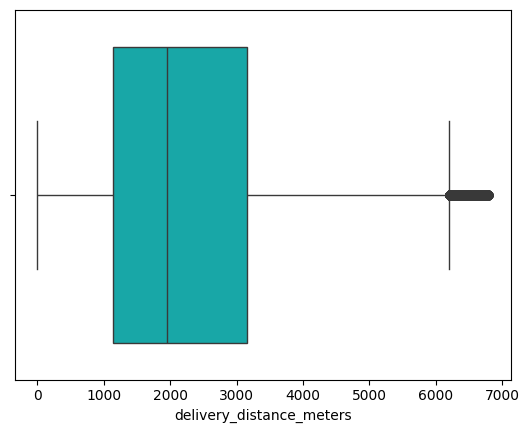

In [265]:
analise_deliveries = deliveries.dropna(subset = ['driver_id', 'delivery_distance_meters'])

q1 = analise_deliveries['delivery_distance_meters'].quantile(0.25)
q3 = analise_deliveries['delivery_distance_meters'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

analise_sem_outliers = analise_deliveries[
    (analise_deliveries['delivery_distance_meters'] >= lower_bound) & 
    (analise_deliveries['delivery_distance_meters'] <= upper_bound)
]

sns.boxplot(data=analise_sem_outliers, x="delivery_distance_meters", color="c")
plt.show()


In [266]:
maiores100 = deliveries.nlargest(100, 'delivery_distance_meters')

maiores100['delivery_status'].value_counts(normalize=True)['CANCELLED']

np.float64(0.26)

Os pedidos de maior distância (100) tem uma chance 13x maior que o normal de ser cancelado


In [267]:
menores100 = deliveries.nsmallest(100, 'delivery_distance_meters')
maiores1000 = deliveries.nlargest(1000, 'delivery_distance_meters')
menores1000 = deliveries.nsmallest(1000, 'delivery_distance_meters')

percentuais = [
    ['Maiores 100', maiores100['driver_id'].isnull().mean().round(2), maiores100['delivery_status'].value_counts(normalize=True)['CANCELLED'].round(2)],
    ['Maiores 1000', maiores1000['driver_id'].isnull().mean().round(2), maiores1000['delivery_status'].value_counts(normalize=True)['CANCELLED'].round(2)],
    ['Média geral', deliveries['driver_id'].isnull().mean().round(2), deliveries['delivery_status'].value_counts(normalize=True)['CANCELLED'].round(2)],
    ['Menores 1000', menores1000['driver_id'].isnull().mean().round(2), menores1000['delivery_status'].value_counts(normalize=True)['CANCELLED'].round(2)],
    ['Menores 100', menores100['driver_id'].isnull().mean().round(2), menores100['delivery_status'].value_counts(normalize=True)['CANCELLED'].round(2)]
]

df = pd.DataFrame(percentuais, columns=['Distâncias', 'Número de Driver = Null', 'Taxa de cancelamento'])

df

,Distâncias,Número de Driver = Null,Taxa de cancelamento
0,Maiores 100,0.98,0.26
1,Maiores 1000,0.63,0.12
2,Média geral,0.04,0.02
3,Menores 1000,0.11,0.05
4,Menores 100,0.56,0.15


O número dos driver_id nulos é muito grande perto das bordas, o que pode indicar que esse tipo de entrega seja diferente, possívelmente sem um entregador específico.

#### Drivers

In [268]:
drivers.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


In [269]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB


In [270]:
drivers.duplicated().sum()

np.int64(0)

In [271]:
drivers.driver_modal.value_counts(normalize=True)

driver_modal
MOTOBOY    0.66791
BIKER      0.33209
Name: proportion, dtype: float64

In [272]:
drivers.driver_type.value_counts(normalize=True)

driver_type
FREELANCE            0.816542
LOGISTIC OPERATOR    0.183458
Name: proportion, dtype: float64

#### Hub

In [273]:
hub.head()

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


In [274]:
hub.info()

hub.hub_city.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hub_id         32 non-null     int64  
 1   hub_name       32 non-null     object 
 2   hub_city       32 non-null     object 
 3   hub_state      32 non-null     object 
 4   hub_latitude   32 non-null     float64
 5   hub_longitude  32 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ KB


array(['PORTO ALEGRE', 'RIO DE JANEIRO', 'SAO PAULO', 'CURITIBA'],
      dtype=object)

In [275]:
hub.duplicated().sum()

np.int64(0)

In [276]:
hub.hub_state.unique()

array(['RS', 'RJ', 'SP', 'PR'], dtype=object)

Só existem 4 cidades, cada uma em um estado, e existem 32 hubs diferentes, cada um com sua id

#### Orders

In [277]:
orders.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
orders.columns

Index(['order_id', 'store_id', 'channel_id', 'payment_order_id',
       'delivery_order_id', 'order_status', 'order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_created', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time', 'order_metric_transit_time',
       'order_metric_cycle_time'],
      dtype='object')

In [279]:
orders.tail()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
368994,93139806,2074,5,93139806,93139806,FINISHED,28.0,0.0,0.00,23,...,5/1/2021 12:44:39 AM,NaN,5/1/2021 1:08:04 AM,0.67,18.33,22.00,4.80,23.13,23.42,68.53
368995,93139809,707,5,93139809,93139809,FINISHED,49.0,11.9,10.04,23,...,5/1/2021 12:36:36 AM,NaN,5/1/2021 12:57:16 AM,1.42,3.48,27.32,6.13,9.62,20.67,57.60
368996,93139813,631,5,93139813,93139813,FINISHED,128.7,11.9,9.29,23,...,5/1/2021 12:47:47 AM,NaN,5/1/2021 1:05:20 AM,11.72,6.38,29.97,11.75,18.13,17.55,65.65
368997,93139814,631,5,93139814,93139814,FINISHED,127.4,11.9,5.00,23,...,5/1/2021 12:31:50 AM,NaN,5/1/2021 12:45:00 AM,NaN,NaN,30.27,NaN,1.88,13.17,45.32
368998,93139817,236,5,93139817,93139817,FINISHED,104.7,11.9,10.67,23,...,5/1/2021 12:26:24 AM,NaN,5/1/2021 12:47:31 AM,NaN,NaN,16.33,NaN,10.27,21.12,47.72


In [280]:
orders.order_status.value_counts(normalize=True)

order_status
FINISHED    0.953986
CANCELED    0.046014
Name: proportion, dtype: float64

In [281]:
orders[['order_amount', 'order_delivery_fee', 'order_delivery_cost']].describe().round(2)

,order_amount,order_delivery_fee,order_delivery_cost
count,368999.00,368999.00,361794.00
mean,105.15,6.18,7.29
std,2953.11,6.22,4.08
min,0.00,0.00,0.00
25%,39.90,0.00,5.16
50%,71.60,6.90,7.19
75%,121.90,11.90,8.72
max,1788306.11,990.11,156.00


In [282]:
orders.query("order_amount > 1000")[["order_amount","order_status"]].sort_values(by = "order_amount" )

,order_amount,order_status
136801,1003.32,FINISHED
310825,1003.80,FINISHED
333974,1006.47,FINISHED
238872,1006.70,FINISHED
189441,1007.25,FINISHED
...,...,...
263818,19320.00,CANCELED
255465,20000.00,FINISHED
255517,25000.00,FINISHED
366536,100000.11,FINISHED


In [283]:
maiores100 = orders.nlargest(100, "order_amount")
maiores100['order_status'].value_counts(normalize=True)

order_status
FINISHED    0.93
CANCELED    0.07
Name: proportion, dtype: float64

In [284]:
orders['order_status'].value_counts(normalize=True).round(2)

order_status
FINISHED    0.95
CANCELED    0.05
Name: proportion, dtype: float64

#### Payments

In [285]:
payments.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


In [286]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400834 entries, 0 to 400833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_id        400834 non-null  int64  
 1   payment_order_id  400834 non-null  int64  
 2   payment_amount    400834 non-null  float64
 3   payment_fee       400659 non-null  float64
 4   payment_method    400834 non-null  object 
 5   payment_status    400834 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 18.3+ MB


In [287]:
query_fineshed = orders.query('order_status == "FINISHED"') 
sum_order_amount = query_fineshed['order_amount'].sum() + query_fineshed['order_delivery_fee'].sum()
query_paid = payments.query('payment_status == "PAID"') 
sum_payment_amount= query_paid['payment_amount'].sum()

dif_amount = ((sum_order_amount - sum_payment_amount)/sum_payment_amount*100)

print(f'A perda de dados de receita entre os dfs de orders e payments é de {dif_amount:.2f}%')

A perda de dados de receita entre os dfs de orders e payments é de 0.47%


In [288]:
payments.groupby('payment_method')['payment_fee'].mean()

payment_method
BANK_TRANSFER_DC            1.112233
CREDIT                      1.524190
CREDIT_STORE                2.258411
DEBIT                       0.994317
DEBIT_STORE                 1.456460
INSTALLMENT_CREDIT_STORE    9.916460
MEAL_BENEFIT                0.000000
MONEY                       0.500403
ONLINE                      2.170466
PAYMENT_LINK                2.125375
STORE_DIRECT_PAYMENT        5.468755
VOUCHER                     0.000000
VOUCHER_DC                  0.700497
VOUCHER_OL                  0.695130
VOUCHER_STORE               2.859780
Name: payment_fee, dtype: float64

In [289]:
payments.payment_status.value_counts()

payment_status
PAID          400381
CHARGEBACK       438
AWAITING          15
Name: count, dtype: int64

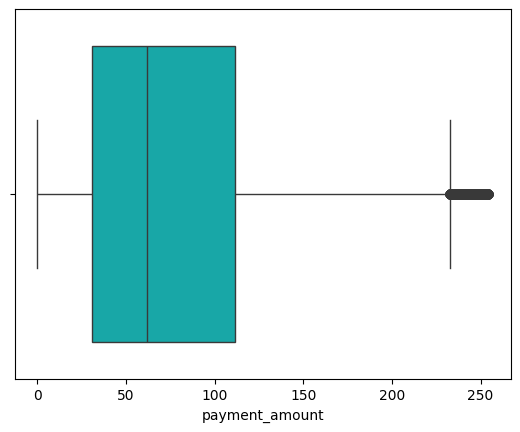

In [290]:
q1 = payments['payment_amount'].quantile(0.25)
q3 = payments['payment_amount'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

payments_sem_outiliers = payments[
    (payments['payment_amount'] >= lower_bound) & 
    (payments['payment_amount'] <= upper_bound)
]


sns.boxplot(data=payments_sem_outiliers, x="payment_amount", color="c")
plt.show()

#### Stores

In [291]:
stores.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


In [292]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          951 non-null    int64  
 1   hub_id            951 non-null    int64  
 2   store_name        951 non-null    object 
 3   store_segment     951 non-null    object 
 4   store_plan_price  836 non-null    float64
 5   store_latitude    935 non-null    float64
 6   store_longitude   935 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.1+ KB


In [293]:
stores.store_plan_price.value_counts()

store_plan_price
29.00    252
29.90    177
49.00    173
49.90    159
0.00      62
1.00       7
0.01       3
29.29      1
19.90      1
39.00      1
Name: count, dtype: int64

In [294]:
stores.store_segment.value_counts()

store_segment
GOOD    567
FOOD    384
Name: count, dtype: int64

## Demandas

### Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover.

In [295]:
print(f'Os tipos de profissionais que tem em driver_type são {drivers.driver_type.unique()[0]} e {drivers.driver_type.unique()[1]} enquanto os modelos de locomoção driver_modal são {drivers.driver_modal.unique()[0]} e {drivers.driver_modal.unique()[1]}')

Os tipos de profissionais que tem em driver_type são LOGISTIC OPERATOR e FREELANCE enquanto os modelos de locomoção driver_modal são MOTOBOY e BIKER


In [296]:
query_mot = deliveries.query("delivery_status == 'DELIVERED'")

distancia_ttl_motoristas = query_mot.groupby('driver_id')['delivery_distance_meters'].sum()

distancia_ttl_motoristas = pd.DataFrame(distancia_ttl_motoristas)

Verifiquei que existem 191 casos onde há distância percorrido mesmo com o pedido for cancelado, e que possuem um driver_id atrelado.

Para resolver esse problema e o de entregas que estão sendo realizadas no momento, para esse problema considerarei apenas entregas já realizadas.

In [297]:
ttl_motoristas_categorizados = distancia_ttl_motoristas.merge(drivers, on='driver_id',how='left')

ttl_motoristas_categorizados.rename(columns={'driver_id':'Motorista'},inplace=True)
ttl_motoristas_categorizados.rename(columns={'delivery_distance_meters':'Distância total'},inplace=True)
ttl_motoristas_categorizados.rename(columns={'driver_modal':'Modelo'},inplace=True)
ttl_motoristas_categorizados.rename(columns={'driver_type':'Contrato'},inplace=True)

motoristas_premiados = ttl_motoristas_categorizados.nlargest(20,'Distância total')

motoristas_premiados

,Motorista,Distância total,Modelo,Contrato
2044,26223.0,60402511.0,MOTOBOY,LOGISTIC OPERATOR
1990,25651.0,32455861.0,MOTOBOY,LOGISTIC OPERATOR
1378,15898.0,8209339.0,MOTOBOY,LOGISTIC OPERATOR
1511,17749.0,8060048.0,MOTOBOY,FREELANCE
114,731.0,7199476.0,MOTOBOY,FREELANCE
2457,31023.0,6075223.0,MOTOBOY,FREELANCE
3261,42146.0,4845699.0,MOTOBOY,FREELANCE
1057,11063.0,4829062.0,MOTOBOY,FREELANCE
1265,14136.0,4320123.0,MOTOBOY,FREELANCE
61,464.0,4247096.0,MOTOBOY,LOGISTIC OPERATOR


Para ajudar na escolha, trago visualizações adicionais

Text(0.5, 1.0, 'Distância percorrida por categorias')

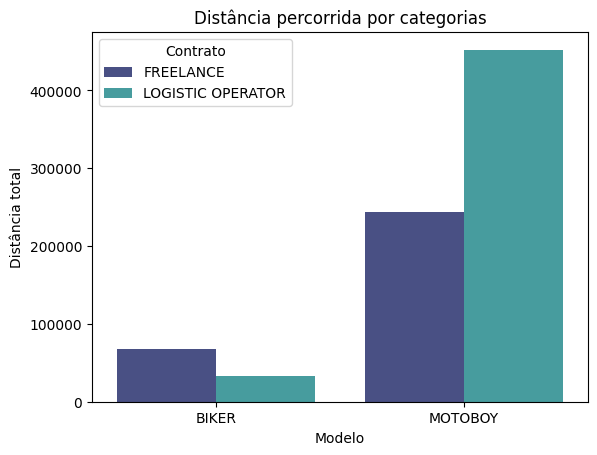

In [298]:
media_dist_perco = pd.DataFrame(ttl_motoristas_categorizados.groupby(['Modelo','Contrato'])['Distância total'].mean())

sns.barplot(data= media_dist_perco, x='Modelo', y='Distância total',hue='Contrato',palette="mako").set_title('Distância percorrida por categorias')

In [299]:
ttl_motoristas_categorizados.query("Contrato == 'LOGISTIC OPERATOR' and Modelo =='BIKER'")

,Motorista,Distância total,Modelo,Contrato
2599,32843.0,32572.0,BIKER,LOGISTIC OPERATOR


Há apenas um entregador que é contratado e utiliza de bicicleta

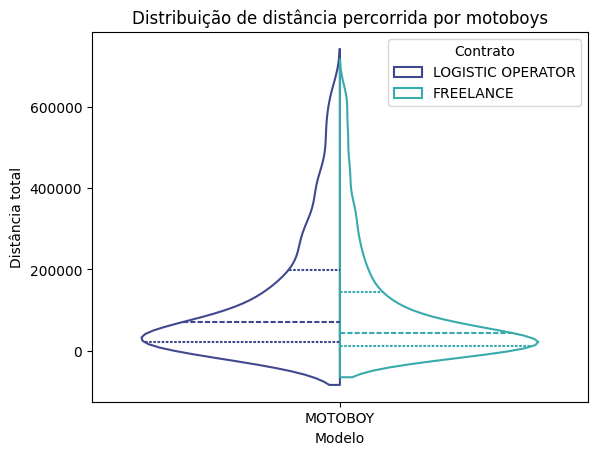

In [300]:
motoboy_distancia = ttl_motoristas_categorizados.query("Modelo == 'MOTOBOY'")

q1 = motoboy_distancia['Distância total'].quantile(0.25)
q3 = motoboy_distancia['Distância total'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

motoristas_sem_outliers = motoboy_distancia[
    (motoboy_distancia['Distância total'] >= lower_bound) & 
    (motoboy_distancia['Distância total'] <= upper_bound)
]


sns.violinplot(data=motoristas_sem_outliers,x='Modelo', y='Distância total',hue='Contrato',palette="mako",
               split=True, inner="quart", fill=False).set_title('Distribuição de distância percorrida por motoboys')

plt.show()

In [301]:
tab1 = query_mot[['driver_id','delivery_distance_meters','delivery_order_id']]
tab2 = orders[['delivery_order_id','store_id']]
tab3 = stores[['store_id','hub_id']]
tab4 = hub[['hub_id','hub_state']]

tab_a = tab1.merge(tab2, on='delivery_order_id', how='left')
tab_b = tab_a.merge(tab3, on='store_id', how='left')
tab_c = tab_b.merge(tab4, on='hub_id',how='left')

tab_c

distancia_media_por_estado = pd.DataFrame(tab_c.groupby('hub_state')['delivery_distance_meters'].mean().round())
distancia_media_por_estado.rename(columns={'delivery_distance_meters':'Distância Média'}, inplace=True)
distancia_media_por_estado.index.name = 'Estado'
distancia_media_por_estado = distancia_media_por_estado.sort_values(by = 'Distância Média', ascending=False)

tab_c

,driver_id,delivery_distance_meters,delivery_order_id,store_id,hub_id,hub_state
0,8378.0,5199.0,68413340,631,28,SP
1,2473.0,410.0,68414309,236,13,RJ
2,7615.0,3784.0,68416230,1016,36,RS
3,8378.0,5714.0,68412721,631,28,SP
4,10463.0,3746.0,68414018,3265,37,SP
...,...,...,...,...,...,...
371362,7615.0,8110.0,87083078,1093,36,RS
371363,26223.0,14454.0,87660079,657,21,SP
371364,55429.0,2546.0,82340127,435,16,RJ
371365,47016.0,3106.0,88586792,2112,51,RJ


In [302]:
distancia_media_por_estado

,Distância Média
Estado,
PR,15037.0
SP,14624.0
RJ,4311.0
RS,4123.0


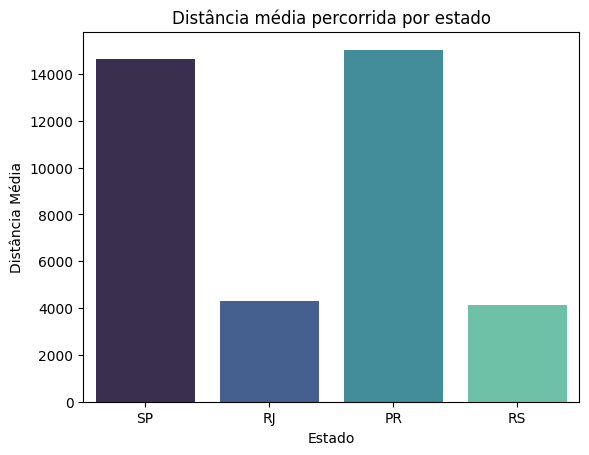

In [303]:
distancia_total_por_estado = pd.DataFrame(tab_c.groupby('hub_state')['delivery_distance_meters'].sum().round())
distancia_total_por_estado.rename(columns={'delivery_distance_meters':'Distância Total'}, inplace=True)
distancia_total_por_estado.index.name = 'Estado'

distancia_por_estado = distancia_media_por_estado.merge(distancia_total_por_estado,on='Estado',how='left')
distancia_por_estado = distancia_por_estado.sort_values(by = 'Distância Total',ascending=False)

sns.barplot(data= distancia_por_estado, x='Estado', y='Distância Média', hue='Estado', palette="mako").set_title('Distância média percorrida por estado')

plt.show()

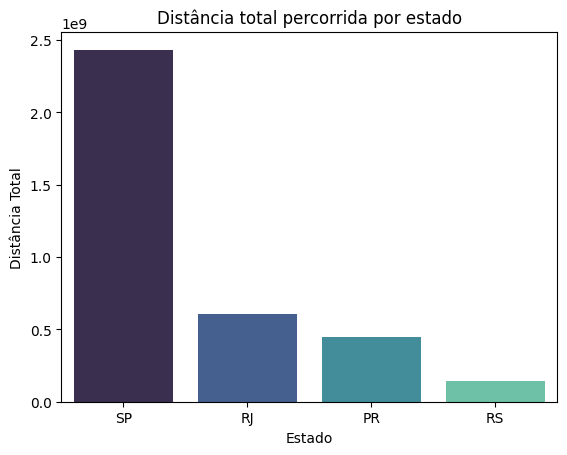

In [304]:
sns.barplot(data= distancia_por_estado, x='Estado', y='Distância Total', hue='Estado', palette="mako").set_title('Distância total percorrida por estado')

plt.show()

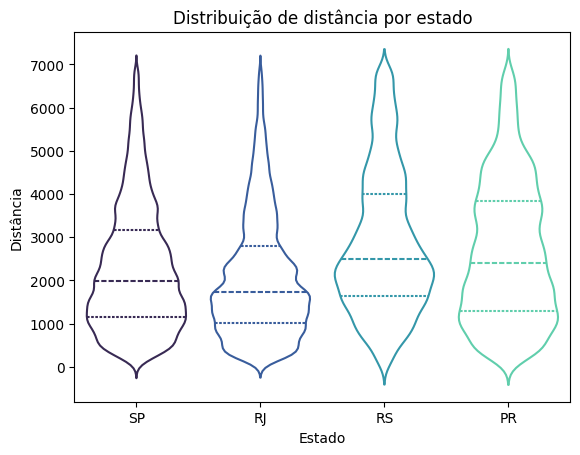

In [305]:
tab_c.rename(columns={'delivery_distance_meters':'Distância'}, inplace=True)
tab_c.rename(columns={'hub_state':'Estado'}, inplace=True)


q1 = tab_c['Distância'].quantile(0.25)
q3 = tab_c['Distância'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

tab_c_sem_outiliers = tab_c[
    (tab_c['Distância'] >= lower_bound) & 
    (tab_c['Distância'] <= upper_bound)
]
sns.violinplot(data=tab_c_sem_outiliers, x='Estado', y='Distância', hue='Estado', palette='mako',
               split=False, inner="quart", fill=False).set_title('Distribuição de distância por estado')

plt.show()

### Por fim, o CFO precisa de alguns indicadores de receita para apresentar para a diretoria executiva. Dentre esses indicadores, vocês precisarão levantar (1) a receita média e total separada por tipo (Food x Good), (2) A receita média e total por estado. Ou seja, são 4 tabelas ao todo.

In [306]:
tab_payment = payments[payments["payment_status"] == "PAID"].groupby("payment_order_id")[["payment_amount"]].sum().reset_index()

tab_order = orders[['payment_order_id', 'store_id']]
tab_stores = stores[['store_id', 'hub_id', 'store_segment']]
tab_hub = hub[['hub_id', 'hub_state']]

tab_pay_order = tab_payment.merge(tab_order, on='payment_order_id', how='left')
tab_order_stores = tab_pay_order.merge(tab_stores, on='store_id', how='left')
tab_stores_hub = tab_order_stores.merge(tab_hub, on='hub_id',how='left')


tkm_food =  pd.DataFrame(tab_order_stores.groupby('store_segment')['payment_amount'].mean().round(2).sort_values(ascending=False))
tkm_food.rename(columns={'payment_amount':'TKM'}, inplace=True)
revenue_food =  pd.DataFrame(tab_order_stores.groupby('store_segment')['payment_amount'].sum().round(2).sort_values(ascending=False))
revenue_food.rename(columns={'payment_amount':'Revenue'}, inplace=True)

food_good = revenue_food.merge(tkm_food, on='store_segment', how='inner')
food_good.index.name = 'Segment'


tkm_estado = pd.DataFrame(tab_stores_hub.groupby('hub_state')['payment_amount'].mean().round(2).sort_values(ascending=False))
tkm_estado.rename(columns={'payment_amount':'TKM'}, inplace=True)
revenue_estado = pd.DataFrame(tab_stores_hub.groupby('hub_state')['payment_amount'].sum().round(2).sort_values(ascending=False))
revenue_estado.rename(columns={'payment_amount':'Revenue'}, inplace=True)

estado = revenue_estado.merge(tkm_estado, on='hub_state',how='inner')
estado.index.name = 'State'


In [307]:
food_good

,Revenue,TKM
Segment,,
FOOD,28017106.48,90.71
GOOD,9287126.30,226.43


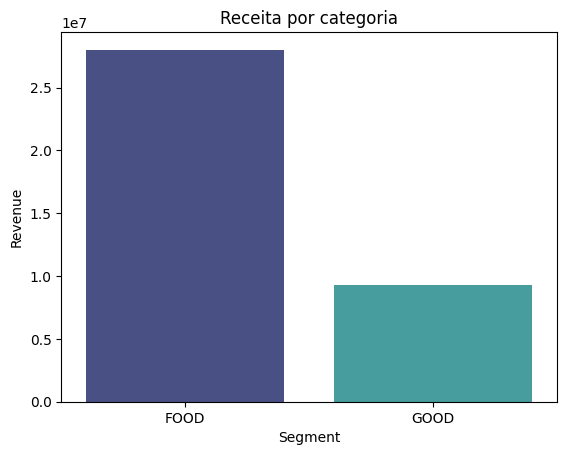

In [308]:
sns.barplot(data= food_good, x='Segment', y='Revenue', hue='Segment', palette="mako").set_title('Receita por categoria')

plt.show()

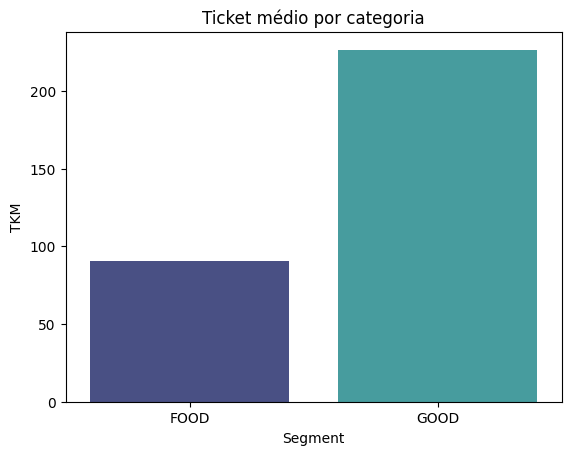

In [309]:
sns.barplot(data= food_good, x='Segment', y='TKM', hue='Segment', palette="mako").set_title('Ticket médio por categoria')

plt.show()

In [310]:
estado

,Revenue,TKM
State,,
SP,19670213.33,123.89
RJ,12664651.97,97.23
RS,2993184.65,90.96
PR,1976182.83,70.66


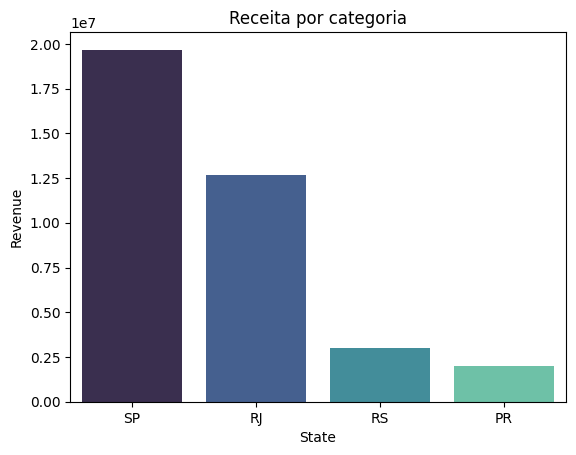

In [311]:
sns.barplot(data= estado, x='State', y='Revenue', hue='State', palette="mako").set_title('Receita por categoria')

plt.show()

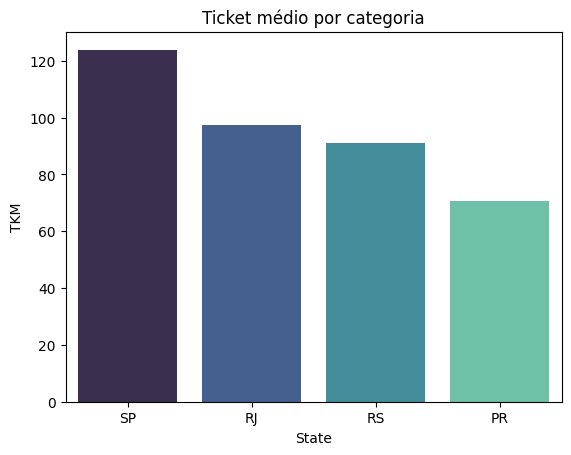

In [312]:
sns.barplot(data= estado, x='State', y='TKM', hue='State', palette="mako").set_title('Ticket médio por categoria')

plt.show()

### Se a empresa tem um gasto fixo de 5 reais por entrega, recebe 15% do valor de cada entrega como receita e, do total do lucro, distribui 20% em forma de bônus para os 2 mil funcionários, quanto cada um irá receber no período contido no dataset?

In [313]:
tab_deli = deliveries[['delivery_id','delivery_order_id','delivery_distance_meters','delivery_status']]
tab_orde = orders[['delivery_order_id','order_delivery_cost','payment_order_id']]
tab_paym1 = payments[['payment_order_id','payment_amount','payment_status']]
tab_paym = tab_paym1[tab_paym1["payment_status"] == "PAID"]

tab_deli_orde = tab_deli.merge(tab_orde, on= 'delivery_order_id', how='left')
tab_orde_paym = tab_deli_orde.merge(tab_paym, on='payment_order_id',how='inner')

tab_orde_paym["fixo"] = 5

fixo_total = tab_orde_paym['fixo'].sum()

variavel_total = tab_orde_paym['order_delivery_cost'].sum()

receita = tab_orde_paym['payment_amount'].sum()

lucro_bruto = receita*0.15

lucro_liquido = lucro_bruto - fixo_total

bonus_total = lucro_liquido*0.2

bonus_pp = round(bonus_total/2000,2)

bonus_pp

print(f'O bônus por pessoa será de R${bonus_pp}')

O bônus por pessoa será de R$382.35
